In [119]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/adidas-vs-nike/Adidas Vs Nike.csv


# **Load the data**

In [120]:
nike_adidas_data= pd.read_csv('../input/adidas-vs-nike/Adidas Vs Nike.csv')
nike_adidas_data.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


## Data Shape

In [121]:
nike_adidas_data.shape

(3268, 10)

## Information

In [122]:
nike_adidas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Description    3265 non-null   object 
 7   Rating         3268 non-null   float64
 8   Reviews        3268 non-null   int64  
 9   Last Visited   3268 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 255.4+ KB


### Visualize random rows

In [123]:
nike_adidas_data.sample(5)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
2695,Nike Air Max 90,CD0490-101,0,9995,0,Nike,"Clean lines, versatile and timeless—the people...",5.0,9,2020-04-13T15:28:15
508,Women's adidas Originals Continental 80 Shoes,EE8925,7999,7999,0,Adidas ORIGINALS,Originally launched for activities like aerobi...,4.1,45,2020-04-13T15:06:36
1764,Men's adidas Outdoor Adipu Sandals,CM5975,2999,2999,0,Adidas SPORT PERFORMANCE,Step out in these premium sandals with connect...,1.5,44,2020-04-13T15:07:27
259,Women's adidas Sport Inspired Questar X BYD Shoes,F34668,6599,3299,50,Adidas CORE / NEO,"Elevated, running-inspired style. These shoes ...",1.0,77,2020-04-13T15:06:28
1325,Unisex adidas Originals Superstar Shoes,FW2847,10999,10999,0,Adidas ORIGINALS,"In honour of Chinese New Year, adidas Original...",2.5,92,2020-04-13T15:07:07


# **Data Cleaning**

## Null values

In [124]:
nike_adidas_data.isnull().sum()

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Description      3
Rating           0
Reviews          0
Last Visited     0
dtype: int64

## Duplicates

In [125]:
nike_adidas_data.duplicated().sum()

0

### Eliminate unnecessary columns

In [126]:
nike_adidas_clean = nike_adidas_data.copy(deep=True)
nike_adidas_clean = nike_adidas_clean.drop(columns = ['Description','Last Visited'])

In [127]:
nike_adidas_clean['Brand'].value_counts()

Adidas CORE / NEO           1111
Adidas ORIGINALS             907
Nike                         643
Adidas SPORT PERFORMANCE     606
Adidas Adidas ORIGINALS        1
Name: Brand, dtype: int64

### Filter Nike products

In [128]:
filter_nike = nike_adidas_clean['Brand'] == 'Nike'
nike_clean = nike_adidas_clean[filter_nike]
nike_clean

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
2625,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,0.0,0
2626,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,0.0,0
2627,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,0.0,0
2628,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,0.0,0
2629,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,0.0,0
...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,5.0,1
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,0.0,0
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,5.0,1
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,4.0,4


### Filter Adidas products

In [129]:
filter_adidas = nike_adidas_clean['Brand'] != 'Nike'
adidas_clean = nike_adidas_clean[filter_adidas]
adidas_clean

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72
...,...,...,...,...,...,...,...,...
2620,Men's adidas Adipower Vector 20 Shoes,EF3503,10999,10999,0,Adidas SPORT PERFORMANCE,4.9,47
2621,Men's adidas Cricket Howzat Shoes,EF3505,6999,6999,0,Adidas SPORT PERFORMANCE,4.4,30
2622,Men's Cricket Cri Hase Shoes,CM6008,3999,3999,0,Adidas SPORT PERFORMANCE,2.0,87
2623,Unisex adidas Outdoor Terrex Daroga Water Shoes,BC0980,7999,7999,0,Adidas SPORT PERFORMANCE,4.6,6


### Merge Adidas sub-brand products

In [130]:
adidas_clean.loc[:, 'Brand'] = 'Adidas'
adidas_clean

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas,3.5,72
...,...,...,...,...,...,...,...,...
2620,Men's adidas Adipower Vector 20 Shoes,EF3503,10999,10999,0,Adidas,4.9,47
2621,Men's adidas Cricket Howzat Shoes,EF3505,6999,6999,0,Adidas,4.4,30
2622,Men's Cricket Cri Hase Shoes,CM6008,3999,3999,0,Adidas,2.0,87
2623,Unisex adidas Outdoor Terrex Daroga Water Shoes,BC0980,7999,7999,0,Adidas,4.6,6


### Create new dataframe without sub-brands

In [131]:
adidas_nike_data = pd.concat([adidas_clean,nike_clean])
adidas_nike_data

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas,3.5,72
...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,5.0,1
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,0.0,0
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,5.0,1
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,4.0,4


# **Exploratory data analysis**

## 1. How many products per brand?

In [132]:
adidas_nike_data['Brand'].value_counts()

Adidas    2625
Nike       643
Name: Brand, dtype: int64

In [133]:
q1 = adidas_nike_data['Brand']
q1.value_counts()

Adidas    2625
Nike       643
Name: Brand, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

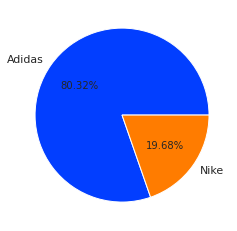

In [134]:
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
# plotting data on chart
plt.pie(q1.value_counts(), labels=q1.value_counts().index, colors=palette_color, autopct='%.2f%%')
plt.show

## 2. Which brand has the most expensive products?

<AxesSubplot:xlabel='Brand', ylabel='Listing Price'>

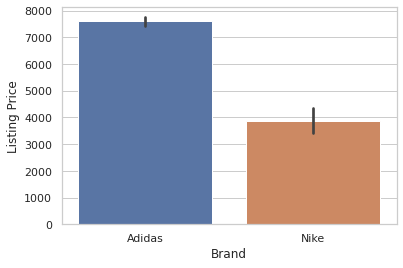

In [135]:
sns.barplot(data=adidas_nike_data, x="Brand", y="Listing Price")

## 3. What is the most required product by brand?

### Products manufactured by Adidas

In [136]:
adidas_clean['Product Name'].count()

2625

Text(0, 0.5, 'Product Name')

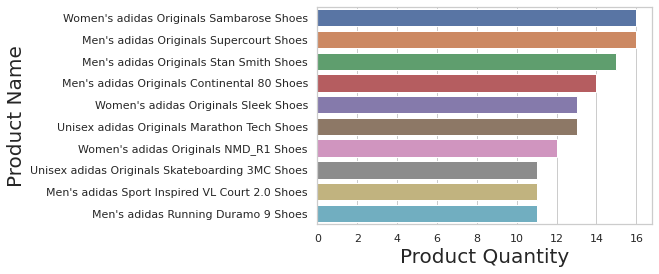

In [137]:
adidas_prod = adidas_clean['Product Name'].value_counts().head(10)
pa = sns.barplot(adidas_prod,adidas_prod.index)
pa.set_xlabel("Product Quantity", fontsize = 20)
pa.set_ylabel("Product Name", fontsize = 20)

### Products manufactured by Nike

In [138]:
nike_clean['Product Name'].count()

643

Text(0, 0.5, 'Product Name')

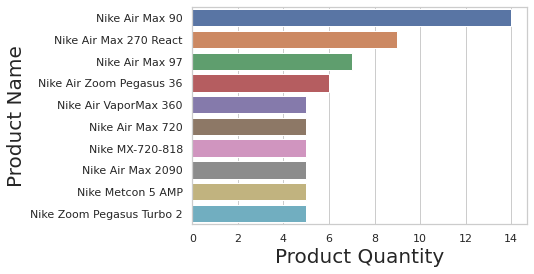

In [139]:
nike_prod = nike_clean['Product Name'].value_counts().head(10)
pn = sns.barplot(nike_prod,nike_prod.index)
pn.set_xlabel("Product Quantity", fontsize = 20)
pn.set_ylabel("Product Name", fontsize = 20)

## 4. What is the best product per brand?

### Best Adidas products

In [140]:
max_rating_adidas = adidas_clean.Rating.max()
print("Adidas's Max Rating: {}\n".format(max_rating_adidas))

Adidas's Max Rating: 5.0



In [141]:
top_rated_adidas = adidas_clean[adidas_clean.Rating == max_rating_adidas]
for item in top_rated_adidas['Product Name']:
    print(item)
print("Quantity of Adidas products with max rating: {}\n".format(top_rated_adidas['Product Name'].count()))

Women's adidas Running Duramo 9 Shoes
Women's adidas Sport Inspired Cloudfoam Pure Shoes
Women's adidas Running Sooraj Shoes
men's ADIDAS RUNNING NEBULAR 1.0 SHOES
Men's adidas Running Kollide Shoes
Women's ADIDAS ORIGINALS NMD_CS2 PK SHOES
Men's adidas Running Stargon 1.0 Shoes
Men's adidas Toe Side II Slippers
Women's adidas Swim Eezay Slippers
Women's adidas Originals Forest Grove Shoes
Men's adidas Sport Inspired Binafo Shoes
WOMEN'S ADIDAS RUNNING QUESA SHOES
Women's adidas Running Duramo SL Shoes
Men's adidas Running Puaro Shoes
Men's adidas Running Kalus 1.0 Shoes
Men's adidas Outdoor Naha Shoes
Women's adidas Originals SL Andridge Shoes
Women's adidas Originals Falcon Shoes
Women's adidas Originals Deerupt Runner Shoes
Men's adidas Running Hellion Z Shoes
Men's adidas Running Questar Ride Shoes
Men's Running Adispree 5.0 Shoes
Men's adidas Swim Salon Slippers
Men's adidas Outdoor Spry II Sandals
Women's adidas Sport Inspired Advantage Shoes
WOMEN'S ADIDAS ORIGINALS ARKYN PRIMEK

In [142]:
top_rated_adidas.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,87.000000,87.000000,87.000000,87.0,87.000000
mean,7458.770115,4959.137931,35.402299,5.0,45.563218
std,3827.819215,3353.688598,20.391779,0.0,27.519845
min,999.000000,499.000000,0.000000,5.0,1.000000
25%,4999.000000,2704.000000,30.000000,5.0,21.000000
50%,6599.000000,3999.000000,40.000000,5.0,46.000000
75%,8299.000000,5999.000000,50.000000,5.0,65.000000
max,17999.000000,17999.000000,60.000000,5.0,99.000000


### Best Nike products

In [143]:
max_rating_nike = nike_clean.Rating.max()
print("Nike's Max Rating: {}\n".format(max_rating_nike))

Nike's Max Rating: 5.0



In [144]:
top_rated_nike = nike_clean[nike_clean.Rating == max_rating_nike]
for item in top_rated_nike['Product Name']:
    print(item)
print("Quantity of Nike products with max rating: {}\n".format(top_rated_nike['Product Name'].count()))

Nike Free Metcon 3
Nike Air Max 270 React ENG
Nike Air Max 90
Air Jordan XXXIV PF
LeBron 7 QS
Nike Air Force 1 '07 LV8
Jordan 'Why Not?' Zer0.3 PF
Nike Metcon 5 AMP
Nike Air Max 97
Nike Renew Fusion
Nike Air Max 90 Premium
Nike Epic Phantom React A.I.R. Cody Hudson
Nike Air Max 90
Nike Air Max 270 React ENG
Nike Free Metcon 3
Nike ISPA Joyride Envelope
Nike Mercurial Superfly 7 Academy MG
Nike Daybreak SP
Kyrie 5 x Bandulu
Nike Air Max Impact
Nike Air Max 90 QS
Nike Air Force 1 '07 LV8
Nike Air Max 90
Nike x Carhartt WIP Air Max 95
Nike Air Zoom Winflo 6
Nike Air Max 97
Nike Air Force 1 '07 LV8
Nike Air Max Verona
Nike Air Max Plus III
Nike Metcon 5 AMP
Nike React Kenny 55
Nike Phantom Vision Club Dynamic Fit FG
Nike Mercurial Superfly 7 Academy IC
Nike Zoom Rival Fly
Jordan Aerospace 720
Nike Air Max Plus III
Nike Air Max 90
Nike Air Zoom Terra Kiger 6
Nike Air Max 97 Utility
Jordan Jumpman 2020 PF
Air Jordan XXXIV PF
Nike React Sertu
Nike React Element 55 SE
Nike SB Zoom Stefan Janos

In [145]:
top_rated_nike.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,120.000000,120.000000,120.0,120.0,120.000000
mean,3502.666667,10753.516667,0.0,5.0,1.741667
std,5750.633905,4214.033119,0.0,0.0,1.399255
min,0.000000,3147.000000,0.0,5.0,1.000000
25%,0.000000,7995.000000,0.0,5.0,1.000000
50%,0.000000,9995.000000,0.0,5.0,1.000000
75%,7995.000000,12995.000000,0.0,5.0,2.000000
max,16995.000000,24995.000000,0.0,5.0,9.000000


# K-means clustering

In [146]:
from sklearn import preprocessing 
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from warnings import filterwarnings
filterwarnings('ignore')

## Adidas products

### Visualize patterns in data

<AxesSubplot:xlabel='Sale Price', ylabel='Rating'>

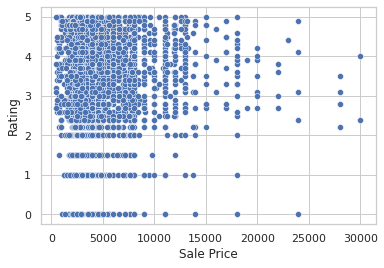

In [147]:
sns.scatterplot(data=adidas_clean, x="Sale Price", y="Rating")

### Normalize the data

In [148]:
adidas_clean.columns

Index(['Product Name', 'Product ID', 'Listing Price', 'Sale Price', 'Discount',
       'Brand', 'Rating', 'Reviews'],
      dtype='object')

In [149]:
adidas_norm = adidas_clean.drop(columns = ['Product Name','Product ID','Brand'])
adidas_norm.head()

,Listing Price,Sale Price,Discount,Rating,Reviews
0,14999,7499,50,4.8,41
1,7599,3799,50,3.3,24
2,999,599,40,2.6,37
3,6999,3499,50,4.1,35
4,7999,3999,50,3.5,72


In [150]:
adidas_norm = adidas_norm.values
adidas_norm.shape

(2625, 5)

In [151]:
min_max_scaler = preprocessing.MinMaxScaler()
adidas_norm_scaled = min_max_scaler.fit_transform(adidas_norm)
df_adidas_new = pd.DataFrame(adidas_norm_scaled)
df_adidas_new.head()

,0,1,2,3,4
0,0.484536,0.238579,0.833333,0.96,0.414141
1,0.230241,0.113367,0.833333,0.66,0.242424
2,0.003436,0.005076,0.666667,0.52,0.373737
3,0.209622,0.103215,0.833333,0.82,0.353535
4,0.243986,0.120135,0.833333,0.70,0.727273


In [152]:
df_adidas_new.columns = ['Listing Price', 'Sale Price', 'Discount','Rating','Reviews']
df_adidas_new.head()

,Listing Price,Sale Price,Discount,Rating,Reviews
0,0.484536,0.238579,0.833333,0.96,0.414141
1,0.230241,0.113367,0.833333,0.66,0.242424
2,0.003436,0.005076,0.666667,0.52,0.373737
3,0.209622,0.103215,0.833333,0.82,0.353535
4,0.243986,0.120135,0.833333,0.70,0.727273


### Elbow curve method

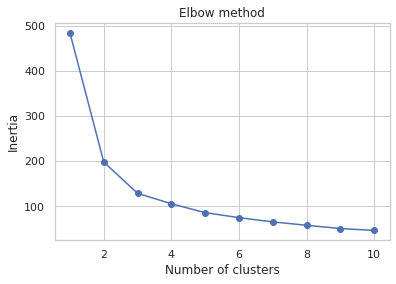

In [153]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_adidas_new.iloc[:,1:4])
    inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [154]:
X = StandardScaler().fit_transform(df_adidas_new)
num_clusters = 3
k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 2 ... 1 1 0]


In [155]:
df_adidas_new["Labels"] = labels
df_adidas_new.head()

,Listing Price,Sale Price,Discount,Rating,Reviews,Labels
0,0.484536,0.238579,0.833333,0.96,0.414141,0
1,0.230241,0.113367,0.833333,0.66,0.242424,2
2,0.003436,0.005076,0.666667,0.52,0.373737,2
3,0.209622,0.103215,0.833333,0.82,0.353535,2
4,0.243986,0.120135,0.833333,0.70,0.727273,2


In [156]:
df_adidas_new.groupby('Labels').mean()

,Listing Price,Sale Price,Discount,Rating,Reviews
Labels,,,,,
0,0.476581,0.359020,0.417824,0.696343,0.482604
1,0.170349,0.180231,0.029449,0.684624,0.491855
2,0.185461,0.099512,0.763195,0.663636,0.494773


<AxesSubplot:xlabel='Sale Price', ylabel='Rating'>

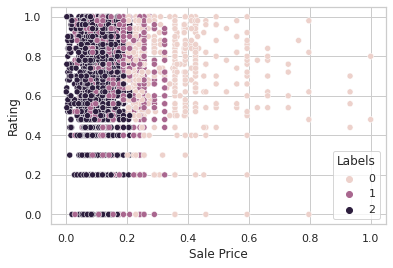

In [157]:
sns.scatterplot(data=df_adidas_new, x="Sale Price", y="Rating", hue="Labels")

<AxesSubplot:xlabel='Listing Price', ylabel='Sale Price'>

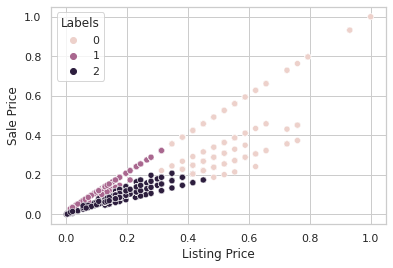

In [158]:
sns.scatterplot(data=df_adidas_new, x="Listing Price", y="Sale Price", hue="Labels")

## Nike products

### Visualize patterns in data

<AxesSubplot:xlabel='Sale Price', ylabel='Rating'>

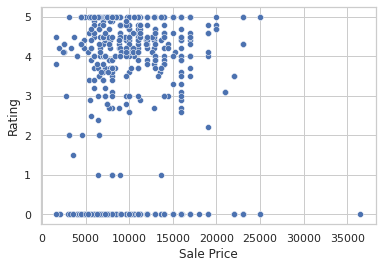

In [159]:
sns.scatterplot(data=nike_clean, x="Sale Price", y="Rating")

### Normalize the data

In [160]:
nike_clean.columns

Index(['Product Name', 'Product ID', 'Listing Price', 'Sale Price', 'Discount',
       'Brand', 'Rating', 'Reviews'],
      dtype='object')

In [161]:
nike_norm = nike_clean.drop(columns = ['Product Name','Product ID','Brand'])
nike_norm.head()

,Listing Price,Sale Price,Discount,Rating,Reviews
2625,0,7495,0,0.0,0
2626,0,7495,0,0.0,0
2627,0,9995,0,0.0,0
2628,0,9995,0,0.0,0
2629,0,9995,0,0.0,0


In [162]:
nike_norm = nike_norm.values
nike_norm.shape

(643, 5)

In [163]:
min_max_scaler_nike = preprocessing.MinMaxScaler()
nike_norm_scaled = min_max_scaler_nike.fit_transform(adidas_norm)
df_nike_new = pd.DataFrame(nike_norm_scaled)
df_nike_new.head()

,0,1,2,3,4
0,0.484536,0.238579,0.833333,0.96,0.414141
1,0.230241,0.113367,0.833333,0.66,0.242424
2,0.003436,0.005076,0.666667,0.52,0.373737
3,0.209622,0.103215,0.833333,0.82,0.353535
4,0.243986,0.120135,0.833333,0.70,0.727273


In [164]:
df_nike_new.columns = ['Listing Price', 'Sale Price', 'Discount','Rating','Reviews']
df_nike_new.head()

,Listing Price,Sale Price,Discount,Rating,Reviews
0,0.484536,0.238579,0.833333,0.96,0.414141
1,0.230241,0.113367,0.833333,0.66,0.242424
2,0.003436,0.005076,0.666667,0.52,0.373737
3,0.209622,0.103215,0.833333,0.82,0.353535
4,0.243986,0.120135,0.833333,0.70,0.727273


### Elbow curve method

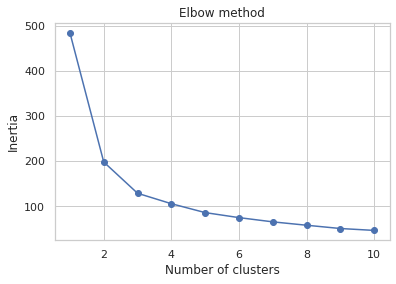

In [165]:
inertias_n = []
for i in range(1,11):
    kmeans_n = KMeans(n_clusters=i)
    kmeans_n.fit(df_nike_new.iloc[:,1:4])
    inertias_n.append(kmeans_n.inertia_)
plt.plot(range(1,11), inertias_n, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [166]:
Xn = StandardScaler().fit_transform(df_nike_new)
num_clusters_n = 3
k_means_n = KMeans(init="k-means++", n_clusters=num_clusters_n, n_init=12)
k_means_n.fit(X)
labels_n = k_means_n.labels_
print(labels_n)

[0 2 2 ... 1 1 0]


In [167]:
df_nike_new["Labels"] = labels_n
df_nike_new.head()

,Listing Price,Sale Price,Discount,Rating,Reviews,Labels
0,0.484536,0.238579,0.833333,0.96,0.414141,0
1,0.230241,0.113367,0.833333,0.66,0.242424,2
2,0.003436,0.005076,0.666667,0.52,0.373737,2
3,0.209622,0.103215,0.833333,0.82,0.353535,2
4,0.243986,0.120135,0.833333,0.70,0.727273,2


In [168]:
df_nike_new.groupby('Labels').mean()

,Listing Price,Sale Price,Discount,Rating,Reviews
Labels,,,,,
0,0.476581,0.359020,0.417824,0.696343,0.482604
1,0.170349,0.180231,0.029449,0.684624,0.491855
2,0.185461,0.099512,0.763195,0.663636,0.494773


<AxesSubplot:xlabel='Sale Price', ylabel='Rating'>

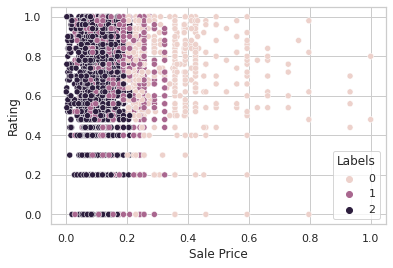

In [169]:
sns.scatterplot(data=df_nike_new, x="Sale Price", y="Rating", hue="Labels")

<AxesSubplot:xlabel='Listing Price', ylabel='Sale Price'>

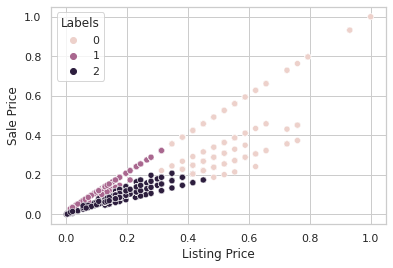

In [170]:
sns.scatterplot(data=df_nike_new, x="Listing Price", y="Sale Price", hue="Labels")